In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\hp\\MTECH PROJECT'

In [3]:
Dataset=pd.read_excel('ModelDataset.xlsx')
Dataset.head()

,H2/CO2,H2/CO,Temp,Pres,PrepM,GHSV,W/F,Catalyst,BET SA,Pore Vol,...,Catalyst E3,Comp E3,Catalyst E4,Comp E4,CO2 Conv,CO Conv,Methanol STY,DME STY,Methanol Sel,DME Sel
0,3.0,NaN,573,2.0,CP,24000.0,NaN,CdZrOx,52.0,NaN,...,NaN,NaN,ZrO2,0.862,5.40,NaN,NaN,NaN,80.0,NaN
1,3.0,NaN,423,3.2,CP,NaN,NaN,CoMn LDHs,83.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,176.10,NaN,NaN,NaN
2,3.0,NaN,423,3.2,CP,NaN,NaN,NiCo LDHs,46.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,335.70,NaN,NaN,NaN
3,3.0,NaN,533,3.0,CP,NaN,1.56,Cu/AlCeO,80.0,0.500,...,NaN,NaN,Al2O3,0.194,17.00,NaN,11.90,NaN,44.7,NaN
4,3.0,NaN,523,3.0,MW assisted IWI,3000.0,NaN,(CuZnGa)microwave,17.0,0.168,...,NaN,NaN,ZnO,0.785,9.77,NaN,3.71,NaN,42.8,NaN


# DATA PREPROCESSING/FEATURE ENGG

In [4]:
Dataset=Dataset.drop(columns=['H2/CO','GHSV','Catalyst','Catalyst E1','Catalyst E2','Catalyst E3','Catalyst E4','CO Conv','DME STY','DME Sel'],axis=1)
Dataset.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.0,573,2.0,CP,NaN,52.0,NaN,NaN,NaN,NaN,0.138,NaN,NaN,0.862,5.40,NaN,80.0
1,3.0,423,3.2,CP,NaN,83.6,NaN,NaN,NaN,NaN,0.683,0.317,NaN,NaN,NaN,176.10,NaN
2,3.0,423,3.2,CP,NaN,46.8,NaN,NaN,NaN,NaN,0.660,0.330,NaN,NaN,NaN,335.70,NaN
3,3.0,533,3.0,CP,1.56,80.0,0.500,22.7,NaN,41.4,0.612,0.194,NaN,0.194,17.00,11.90,44.7
4,3.0,523,3.0,MW assisted IWI,NaN,17.0,0.168,NaN,19.0,7.3,0.166,0.049,NaN,0.785,9.77,3.71,42.8


In [5]:
Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2         126
Comp E3         272
Comp E4           6
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

# Handling Null Values

In [6]:
Dataset['Comp E2']=Dataset['Comp E2'].fillna(0)
Dataset['Comp E3']=Dataset['Comp E3'].fillna(0)
Dataset['Comp E4']=Dataset['Comp E4'].fillna(0)

Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2           0
Comp E3           0
Comp E4           0
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [7]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.0,573,2.0,CP,NaN,52.0,NaN,NaN,NaN,NaN,0.1380,0.000000,0.0,0.862000,5.40,NaN,80.0
1,3.0,423,3.2,CP,NaN,83.6,NaN,NaN,NaN,NaN,0.6830,0.317000,0.0,0.000000,NaN,176.10,NaN
2,3.0,423,3.2,CP,NaN,46.8,NaN,NaN,NaN,NaN,0.6600,0.330000,0.0,0.000000,NaN,335.70,NaN
3,3.0,533,3.0,CP,1.56,80.0,0.500,22.7,NaN,41.4,0.6120,0.194000,0.0,0.194000,17.00,11.90,44.7
4,3.0,523,3.0,MW assisted IWI,NaN,17.0,0.168,NaN,19.0,7.3,0.1660,0.049000,0.0,0.785000,9.77,3.71,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,3.0,425,3.2,PM,NaN,NaN,NaN,NaN,NaN,NaN,0.0092,0.000289,0.0,0.990511,NaN,35.00,NaN
364,3.0,425,3.2,PM,NaN,NaN,NaN,NaN,NaN,NaN,0.0102,0.000320,0.0,0.989480,NaN,30.20,NaN
365,3.0,303,0.1,CPPA,4.67,63.6,NaN,NaN,NaN,NaN,0.0200,0.000000,0.0,0.980000,37.00,11.09,62.6
366,3.0,573,2.0,CP,0.93,44.3,NaN,NaN,NaN,NaN,0.0965,0.000000,0.0,0.903500,4.90,7.75,90.1


In [8]:
# DATA UNIFORMITY CHECK to fill mean,median,mode

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'W/F(g-cat h mol-1)) Distribution Plot')

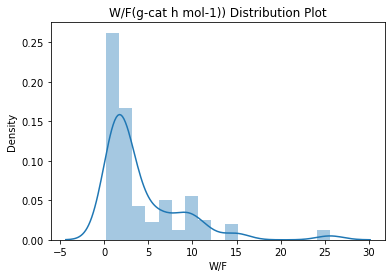

In [9]:
sns.distplot(Dataset['W/F'])
plt.title('W/F(g-cat h mol-1)) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BET Surface Area(m2/g) Distribution Plot')

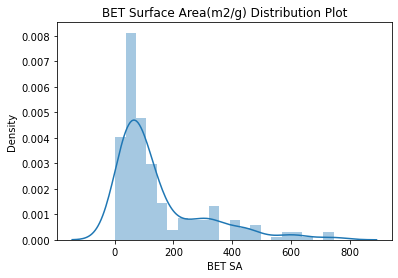

In [10]:
sns.distplot(Dataset['BET SA'])
plt.title('BET Surface Area(m2/g) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Pore Volume(cm3/g) Distribution Plot')

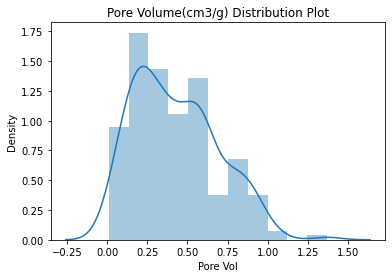

In [11]:
sns.distplot(Dataset['Pore Vol'])
plt.title('Pore Volume(cm3/g) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Pore Size(nm) Distribution Plot')

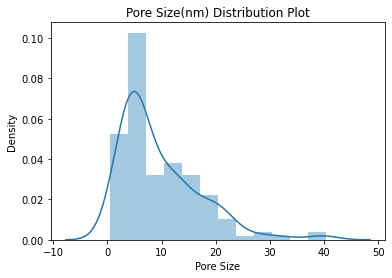

In [12]:
sns.distplot(Dataset['Pore Size'])
plt.title('Pore Size(nm) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Crystal Size(nm) Distribution Plot')

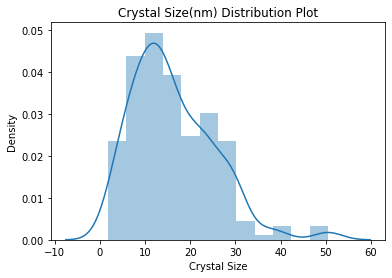

In [13]:
sns.distplot(Dataset['Crystal Size'])
plt.title('Crystal Size(nm) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Metal Surface Area(m2/g) Distribution Plot')

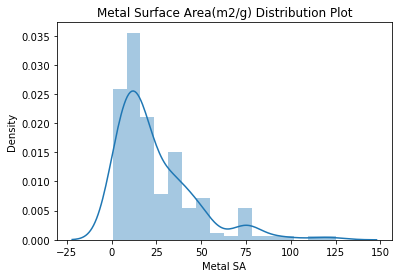

In [14]:
sns.distplot(Dataset['Metal SA'])
plt.title('Metal Surface Area(m2/g) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CO2 Conversion(%) Distribution Plot')

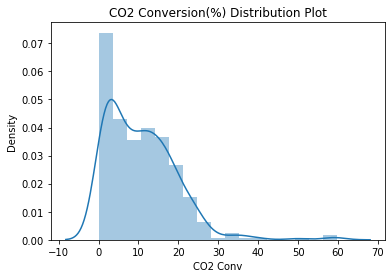

In [15]:
sns.distplot(Dataset['CO2 Conv'])
plt.title('CO2 Conversion(%) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Methanol STY(mol kg-cat−1 h−1) Distribution Plot')

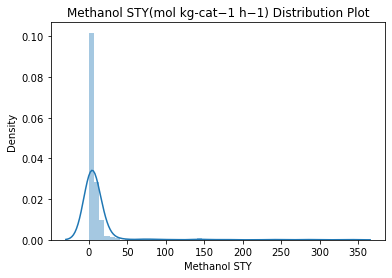

In [16]:
sns.distplot(Dataset['Methanol STY'])
plt.title('Methanol STY(mol kg-cat−1 h−1) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Methanol Selectivity(C-mol %) Distribution Plot')

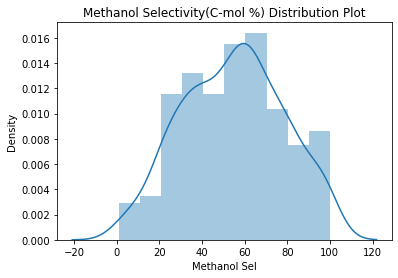

In [17]:
sns.distplot(Dataset['Methanol Sel'])
plt.title('Methanol Selectivity(C-mol %) Distribution Plot')

In [18]:
Dataset['W/F']=Dataset['W/F'].fillna(Dataset['W/F'].median())
Dataset['BET SA']=Dataset['BET SA'].fillna(Dataset['BET SA'].median())
Dataset['Pore Vol']=Dataset['Pore Vol'].fillna(Dataset['Pore Vol'].median())
Dataset['Pore Size']=Dataset['Pore Size'].fillna(Dataset['Pore Size'].median())
Dataset['Crystal Size']=Dataset['Crystal Size'].fillna(Dataset['Crystal Size'].median())
Dataset['Metal SA']=Dataset['Metal SA'].fillna(Dataset['Metal SA'].median())
Dataset['CO2 Conv']=Dataset['CO2 Conv'].fillna(Dataset['CO2 Conv'].median())
Dataset['Methanol STY']=Dataset['Methanol STY'].fillna(Dataset['Methanol STY'].median())
Dataset['Methanol Sel']=Dataset['Methanol Sel'].fillna(Dataset['Methanol Sel'].mean())

Dataset.isnull().sum()


H2/CO2          0
Temp            0
Pres            0
PrepM           0
W/F             0
BET SA          0
Pore Vol        0
Pore Size       0
Crystal Size    0
Metal SA        0
Comp E1         0
Comp E2         0
Comp E3         0
Comp E4         0
CO2 Conv        0
Methanol STY    0
Methanol Sel    0
dtype: int64

In [19]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.0,573,2.0,CP,2.315,52.0,0.380,6.755,14.2,16.9,0.1380,0.000000,0.0,0.862000,5.40,3.008875,80.000000
1,3.0,423,3.2,CP,2.315,83.6,0.380,6.755,14.2,16.9,0.6830,0.317000,0.0,0.000000,9.77,176.100000,54.742963
2,3.0,423,3.2,CP,2.315,46.8,0.380,6.755,14.2,16.9,0.6600,0.330000,0.0,0.000000,9.77,335.700000,54.742963
3,3.0,533,3.0,CP,1.560,80.0,0.500,22.700,14.2,41.4,0.6120,0.194000,0.0,0.194000,17.00,11.900000,44.700000
4,3.0,523,3.0,MW assisted IWI,2.315,17.0,0.168,6.755,19.0,7.3,0.1660,0.049000,0.0,0.785000,9.77,3.710000,42.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,3.0,425,3.2,PM,2.315,84.0,0.380,6.755,14.2,16.9,0.0092,0.000289,0.0,0.990511,9.77,35.000000,54.742963
364,3.0,425,3.2,PM,2.315,84.0,0.380,6.755,14.2,16.9,0.0102,0.000320,0.0,0.989480,9.77,30.200000,54.742963
365,3.0,303,0.1,CPPA,4.670,63.6,0.380,6.755,14.2,16.9,0.0200,0.000000,0.0,0.980000,37.00,11.090000,62.600000
366,3.0,573,2.0,CP,0.930,44.3,0.380,6.755,14.2,16.9,0.0965,0.000000,0.0,0.903500,4.90,7.750000,90.100000


# Label Encoding for Preparation Method

In [20]:
label_encoder = LabelEncoder()
Dataset['PrepM']=label_encoder.fit_transform(Dataset['PrepM'])

# PREPROCESSED DATASET

In [21]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.0,573,2.0,3,2.315,52.0,0.380,6.755,14.2,16.9,0.1380,0.000000,0.0,0.862000,5.40,3.008875,80.000000
1,3.0,423,3.2,3,2.315,83.6,0.380,6.755,14.2,16.9,0.6830,0.317000,0.0,0.000000,9.77,176.100000,54.742963
2,3.0,423,3.2,3,2.315,46.8,0.380,6.755,14.2,16.9,0.6600,0.330000,0.0,0.000000,9.77,335.700000,54.742963
3,3.0,533,3.0,3,1.560,80.0,0.500,22.700,14.2,41.4,0.6120,0.194000,0.0,0.194000,17.00,11.900000,44.700000
4,3.0,523,3.0,11,2.315,17.0,0.168,6.755,19.0,7.3,0.1660,0.049000,0.0,0.785000,9.77,3.710000,42.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,3.0,425,3.2,12,2.315,84.0,0.380,6.755,14.2,16.9,0.0092,0.000289,0.0,0.990511,9.77,35.000000,54.742963
364,3.0,425,3.2,12,2.315,84.0,0.380,6.755,14.2,16.9,0.0102,0.000320,0.0,0.989480,9.77,30.200000,54.742963
365,3.0,303,0.1,4,4.670,63.6,0.380,6.755,14.2,16.9,0.0200,0.000000,0.0,0.980000,37.00,11.090000,62.600000
366,3.0,573,2.0,3,0.930,44.3,0.380,6.755,14.2,16.9,0.0965,0.000000,0.0,0.903500,4.90,7.750000,90.100000


# DATA ANALYSIS

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperature(K) Distribution Plot')

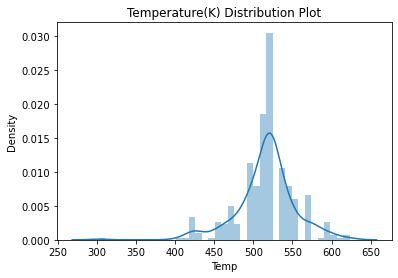

In [22]:
sns.distplot(Dataset['Temp'])
plt.title('Temperature(K) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Pressure(MPa) Distribution Plot')

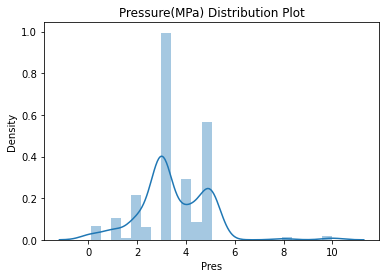

In [23]:
sns.distplot(Dataset['Pres'])
plt.title('Pressure(MPa) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'H2/CO2 Distribution Plot')

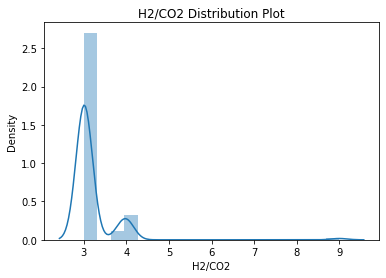

In [24]:
sns.distplot(Dataset['H2/CO2'])
plt.title('H2/CO2 Distribution Plot')

<AxesSubplot:xlabel='PrepM', ylabel='count'>

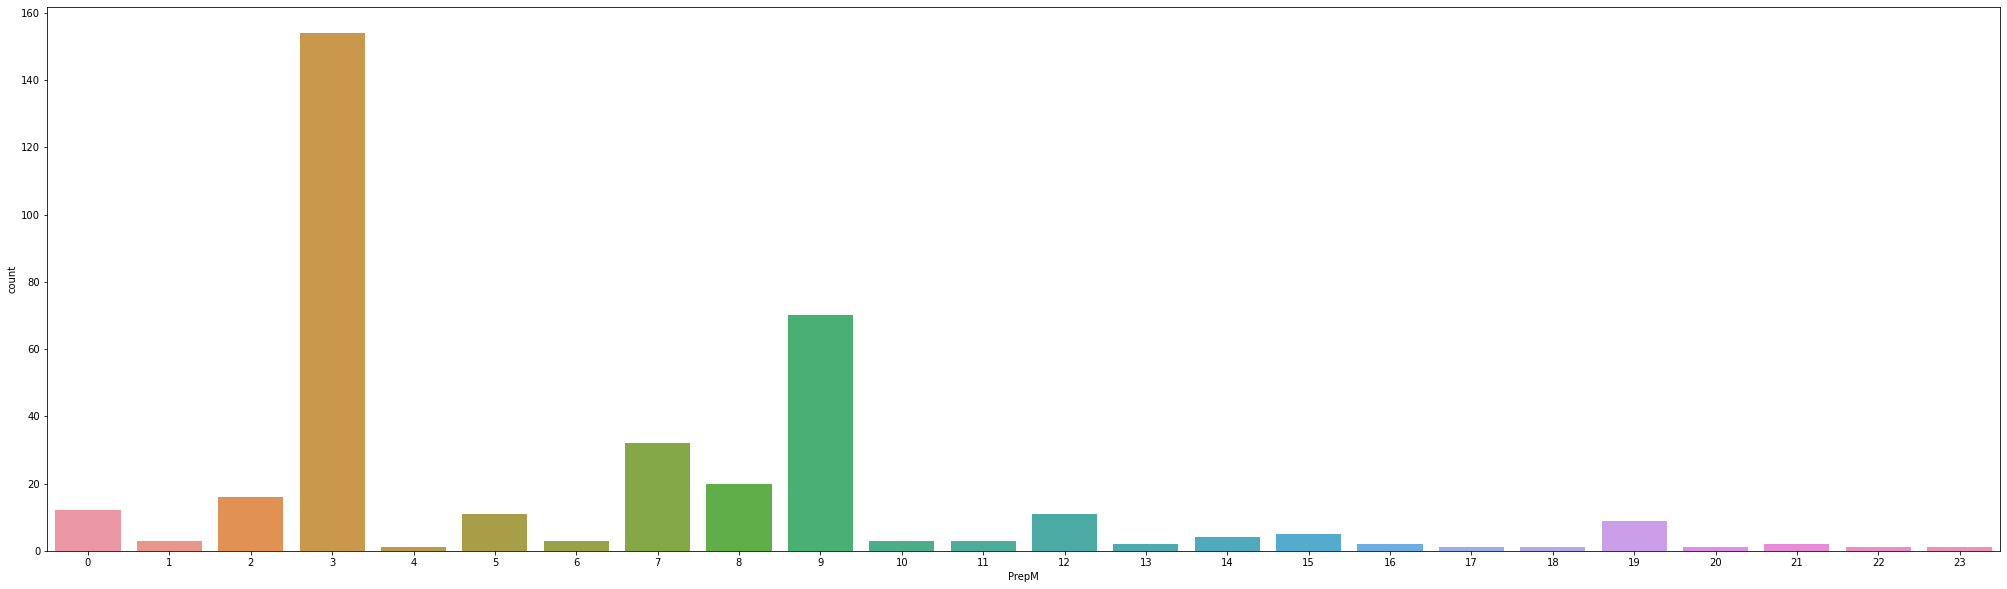

In [25]:
plt.figure(figsize=(35,10))
sns.countplot(x='PrepM',data=Dataset)

Text(0, 0.5, 'Methanol STY')

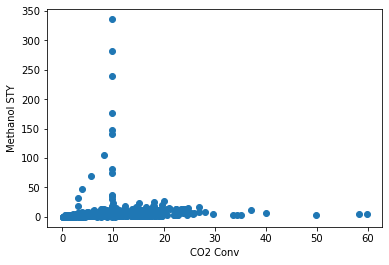

In [26]:
plt.scatter(Dataset['CO2 Conv'],Dataset['Methanol STY'])
plt.xlabel('CO2 Conv')
plt.ylabel('Methanol STY')

Text(0, 0.5, 'Methanol Sel')

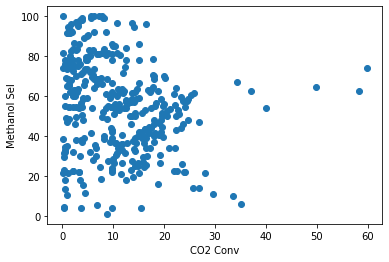

In [27]:
plt.scatter(Dataset['CO2 Conv'],Dataset['Methanol Sel'])
plt.xlabel('CO2 Conv')
plt.ylabel('Methanol Sel')

# CATALYST PROPERTY DATASET

In [28]:
Final_Property=pd.read_excel('Final_Properties_Dataset.xlsx')
Final_Property.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0,4.165567,5.796074,-1.646255,3.145444,5.499135,-0.017166,0.087293,0.044824,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
1,1,0.231088,-1.443908,-1.286246,5.183665,-3.174846,1.672549,-0.179113,2.686381,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
2,2,0.231088,-1.443908,-1.286246,5.183665,-3.559289,1.194096,1.420632,0.871031,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
3,3,-2.163904,-0.235893,0.134307,-0.169250,-2.511624,3.794347,-2.577246,-1.618209,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
4,4,-2.163904,-0.235893,0.134307,-0.169250,-2.679058,-0.246068,-1.292825,0.365615,-2.166423,-0.133318,0.051257,0.028417,0.275136,1.814672,0.275060,3.237843


In [29]:
Final_Property=Final_Property.drop(columns='Unnamed: 0')
Final_Property.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,4.165567,5.796074,-1.646255,3.145444,5.499135,-0.017166,0.087293,0.044824,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
1,0.231088,-1.443908,-1.286246,5.183665,-3.174846,1.672549,-0.179113,2.686381,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
2,0.231088,-1.443908,-1.286246,5.183665,-3.559289,1.194096,1.420632,0.871031,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
3,-2.163904,-0.235893,0.134307,-0.169250,-2.511624,3.794347,-2.577246,-1.618209,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
4,-2.163904,-0.235893,0.134307,-0.169250,-2.679058,-0.246068,-1.292825,0.365615,-2.166423,-0.133318,0.051257,0.028417,0.275136,1.814672,0.275060,3.237843


# FINAL DATASET

In [30]:
Data=pd.concat([Dataset,Final_Property],axis=1)
Data.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,...,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,3.0,573,2.0,3,2.315,52.0,0.380,6.755,14.2,16.9,...,0.087293,0.044824,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
1,3.0,423,3.2,3,2.315,83.6,0.380,6.755,14.2,16.9,...,-0.179113,2.686381,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
2,3.0,423,3.2,3,2.315,46.8,0.380,6.755,14.2,16.9,...,1.420632,0.871031,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
3,3.0,533,3.0,3,1.560,80.0,0.500,22.700,14.2,41.4,...,-2.577246,-1.618209,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
4,3.0,523,3.0,11,2.315,17.0,0.168,6.755,19.0,7.3,...,-1.292825,0.365615,-2.166423,-0.133318,0.051257,0.028417,0.275136,1.814672,0.275060,3.237843


# ANALYSIS

In [85]:
# OUTPUT CORRELATION

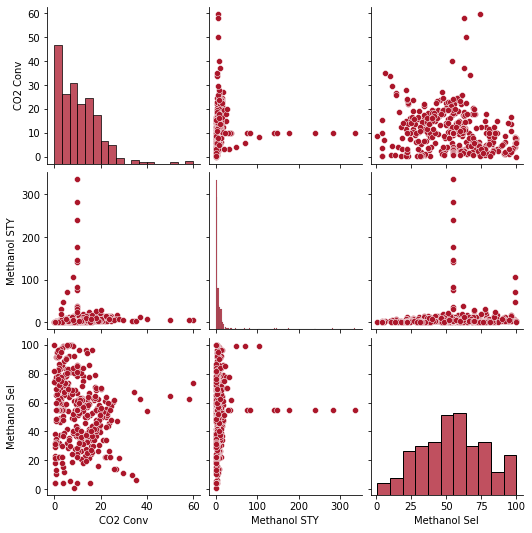

In [91]:
out_param=Data[['CO2 Conv','Methanol STY','Methanol Sel']]

sns.pairplot(out_param)


<AxesSubplot:>

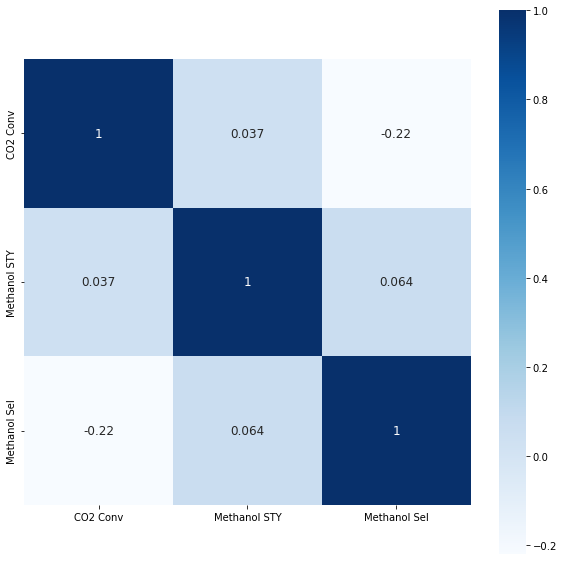

In [93]:
out_corr=out_param.corr()
plt.figure(figsize=(10,10))
sns.heatmap(out_corr,cbar=True,square=True,annot=True,annot_kws={'size':12},cmap='Blues')

In [86]:
# INPUT CORRELATION

In [87]:
in_param=Data.drop(columns=['CO2 Conv','Methanol STY','Methanol Sel'])
in_corr=in_param.corr()
in_corr

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,...,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
H2/CO2,1.000000,0.114386,-0.030800,0.012573,-0.128430,0.035132,0.066471,0.077611,-0.048712,-0.066252,...,-9.326983e-03,-5.336411e-02,-1.156483e-01,-2.814034e-03,-2.447101e-02,7.885065e-03,6.822101e-03,-5.101577e-02,3.112765e-02,-1.084641e-01
Temp,0.114386,1.000000,0.141389,0.113280,-0.109127,0.155112,-0.013119,0.019163,-0.151866,0.121203,...,-2.754191e-02,-2.708555e-01,-1.354445e-01,4.752594e-02,1.937362e-02,1.568496e-02,5.732560e-02,3.112760e-02,-2.012367e-01,1.369382e-02
Pres,-0.030800,0.141389,1.000000,-0.074404,-0.065622,-0.026587,-0.059926,0.006109,0.050763,-0.036615,...,6.714989e-02,-4.064098e-02,9.023952e-02,-5.793528e-02,-2.081129e-01,-3.571612e-02,-9.777085e-02,1.423961e-01,-3.752788e-02,-7.879033e-02
PrepM,0.012573,0.113280,-0.074404,1.000000,0.147940,0.022270,-0.093674,-0.165455,-0.104577,-0.151992,...,-7.928571e-02,2.882844e-02,-4.518162e-02,-4.323077e-02,9.195376e-02,-3.674732e-02,1.814471e-01,2.032871e-02,-4.299336e-02,4.026515e-02
W/F,-0.128430,-0.109127,-0.065622,0.147940,1.000000,-0.058407,-0.116670,0.137279,-0.142879,-0.041281,...,4.327328e-02,-4.384435e-03,1.090197e-01,-1.160917e-02,3.864498e-03,-9.860988e-02,7.063514e-02,2.292952e-01,-1.777377e-01,-5.170021e-02
BET SA,0.035132,0.155112,-0.026587,0.022270,-0.058407,1.000000,0.585234,-0.175440,-0.181209,0.178030,...,-1.123231e-02,-3.444196e-02,-9.113904e-02,1.845853e-01,-1.418044e-02,1.807747e-02,4.464293e-01,-1.893342e-01,-1.629843e-02,-2.653958e-01
Pore Vol,0.066471,-0.013119,-0.059926,-0.093674,-0.116670,0.585234,1.000000,0.110239,-0.196575,0.247160,...,-2.883710e-02,7.324718e-03,6.893322e-03,1.208871e-01,-1.122416e-01,-8.041855e-02,3.622163e-01,-2.519949e-01,5.728754e-02,-1.560559e-01
Pore Size,0.077611,0.019163,0.006109,-0.165455,0.137279,-0.175440,0.110239,1.000000,-0.089547,0.036756,...,2.885992e-01,-1.223763e-01,-5.294097e-02,1.335839e-01,-3.615067e-02,3.527772e-02,-5.422446e-02,-1.071160e-02,1.765854e-02,6.606608e-02
Crystal Size,-0.048712,-0.151866,0.050763,-0.104577,-0.142879,-0.181209,-0.196575,-0.089547,1.000000,-0.360854,...,-4.284113e-02,-8.454311e-02,-1.873597e-01,-2.777893e-03,1.697628e-02,8.806493e-02,-1.514775e-01,-9.172632e-02,1.714461e-02,7.532417e-03
Metal SA,-0.066252,0.121203,-0.036615,-0.151992,-0.041281,0.178030,0.247160,0.036756,-0.360854,1.000000,...,-7.801437e-03,-3.617857e-03,1.440717e-01,2.140936e-01,-1.172730e-01,-5.596133e-02,1.102740e-01,1.254590e-01,-1.070212e-01,-2.553005e-02


<AxesSubplot:>

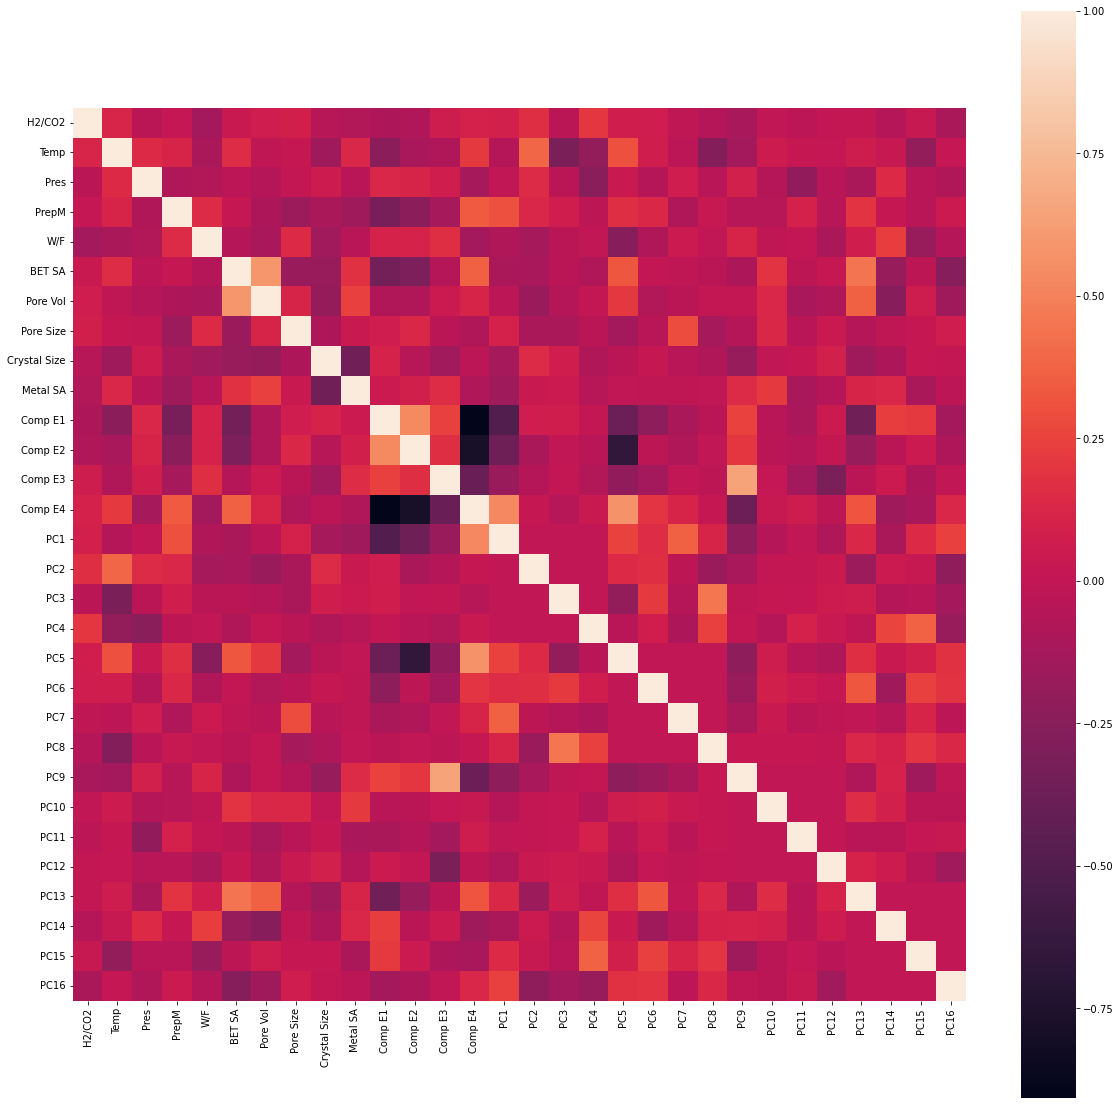

In [84]:
plt.figure(figsize=(20,20))
sns.heatmap(in_corr,cbar=True,square=True)

<Figure size 1080x360 with 0 Axes>

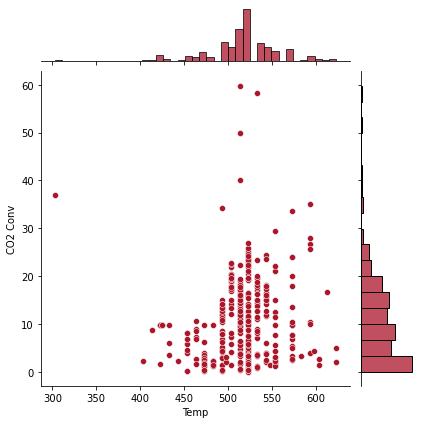

In [106]:
plt.figure(figsize=(15,5))
sns.color_palette()
sns.jointplot(x='Temp',y='CO2 Conv',data=Data)


<Figure size 1080x360 with 0 Axes>

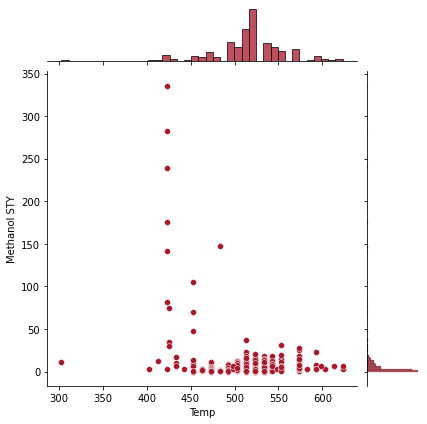

In [107]:
plt.figure(figsize=(15,5))
sns.jointplot(x='Temp',y='Methanol STY',data=Data)


<Figure size 1080x360 with 0 Axes>

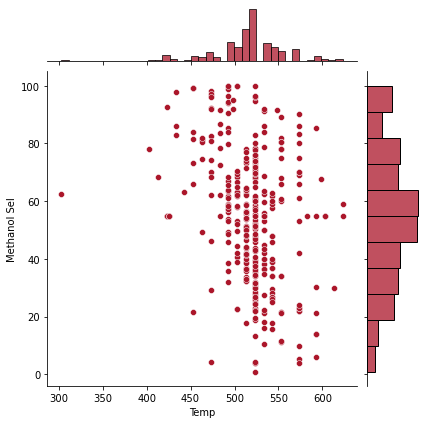

In [108]:
plt.figure(figsize=(15,5))
sns.jointplot(x='Temp',y='Methanol Sel',data=Data)


<Figure size 1080x360 with 0 Axes>

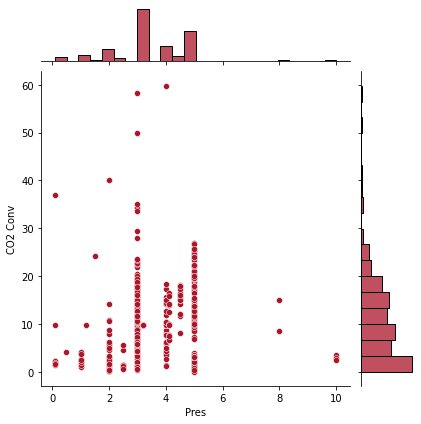

In [110]:
plt.figure(figsize=(15,5))
sns.jointplot(x='Pres',y='CO2 Conv',data=Data)

<Figure size 1080x360 with 0 Axes>

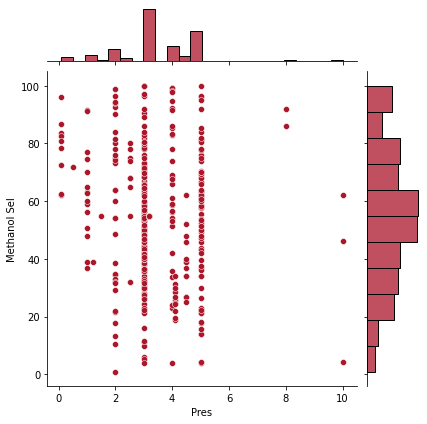

In [109]:
plt.figure(figsize=(15,5))
sns.jointplot(x='Pres',y='Methanol Sel',data=Data)

<Figure size 1080x360 with 0 Axes>

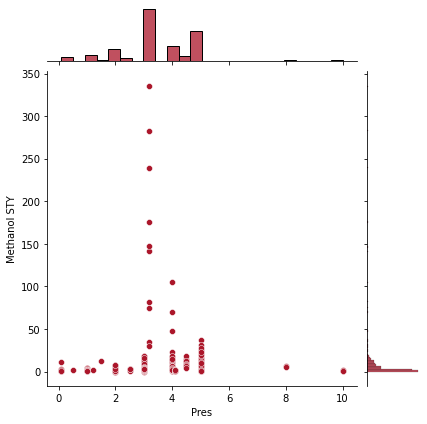

In [111]:
plt.figure(figsize=(15,5))
sns.jointplot(x='Pres',y='Methanol STY',data=Data)